Payam Taebi
400104867
[github](https://github.com/aqaPayam)

<h1 style="text-align: center">
Machine Learning </br>
MLE & MAP in Python
</h1>


## Objective
This exercise will help you gain a deeper understanding of, and insights into, Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) estimation$\textit{Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) }$ :) \\
Let’s say you have a barrel of apples that are all different sizes. You pick an apple at random, and you want to know its weight. Unfortunately, all you have is a broken scale. answer the questions below.

1) For the sake of this section, lets imagine a farmer tells you that the scale returns the weight of the object with an error of +/- a standard deviation of 5g. We can describe this mathematically as:
$$
measurement = weight + \mathcal{N}(0, 5g)
$$
You can weigh the apple as many times as you want, so weigh it 100 times.
plot its histogram of your 100 measurements. (y axis is the counts and x-axis is the measured weight)

true weight is :  70


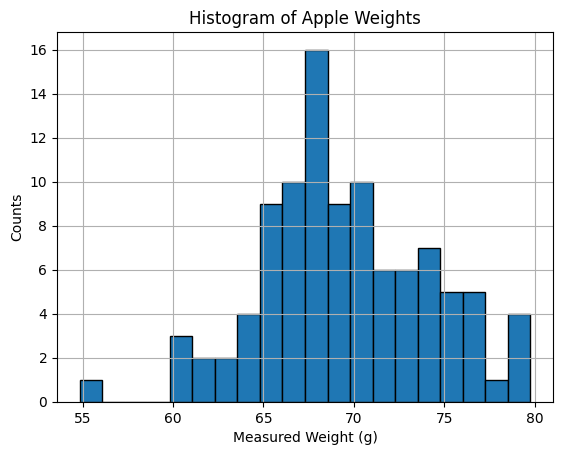

In [1]:
import numpy as np
import matplotlib.pyplot as plt

true_weight = 70  

num_measurements = 100

measurements = np.random.normal(true_weight, 5, num_measurements)

print("true weight is : ",true_weight)

plt.hist(measurements, bins=20, edgecolor='black')
plt.xlabel('Measured Weight (g)')
plt.ylabel('Counts')
plt.title('Histogram of Apple Weights')
plt.grid(True)
plt.show()


2) Find the average weight of the apple.
Is it a good guess? state your reason.

In [2]:
print("True weight of the apple:", true_weight, "g")
print("Average weight of the apple:", np.mean(measurements), "g")

True weight of the apple: 70 g
Average weight of the apple: 69.6085014728416 g


3) we are going to use grid approximation for calculating the MLE. here is the link if you wnat to get more fimilar with this technique:
https://www.bayesrulesbook.com/chapter-6

Our end goal is to find the weight of the apple, given the data we have. To formulate it in a Bayesian way: We’ll ask what is the probability of the apple having weight, $w$, given the measurements we took, $X$. And, because we're formulating this in a Bayesian way, we use Bayes’ Law to find the answer:

$$
P(w|X) = \frac{P(X|w)P(w)}{P(X)}
$$

If we make no assumptions about the initial weight of our apple, then we can drop $P(w)$. We’ll say all sizes of apples are equally likely (we’ll revisit this assumption in the MAP approximation).

Furthermore, we’ll drop $P(X)$ - the probability of seeing our data. This is a normalization constant and will be important if we do want to know the probabilities of apple weights. But, for right now, our end goal is to only to find the most probable weight. $P(X)$ is independent of $w$, so we can drop it if we’re doing relative comparisons.

This leaves us with $P(X|w)$, our likelihood, as in, what is the likelihood that we would see the data, $X$, given an apple of weight $w$. If we maximize this, we maximize the probability that we will guess the right weight.

The grid approximation is probably the simplest way to do this. Basically, we’ll systematically step through different weight guesses, and compare what it would look like if this hypothetical weight were to generate data. We’ll compare this hypothetical data to our real data and pick the one that matches the best.

To formulate this mathematically:

For each of these guesses, we’re asking "what is the probability that the data we have, came from the distribution that our weight guess would generate". Because each measurement is independent from another, we can break the above equation down into finding the probability on a per measurement basis:

$$
P(X|w) = \prod_{i}^{N} p(x_i|w)
$$

So, if we multiply the probability that we would see each individual data point - given our weight guess - then we can find one number comparing our weight guess to all of our data.

The peak in the likelihood is the weight of the apple.

To make it computationally easier,

$$
\log P(X|w) = \log \prod_{i}^{N} p(x_i|w) = \sum_{i}^{N} \log p(d_i|w)
$$



a) Why did we use log likelihood? Is it ok to do so?
We use the log likelihood because it simplifies computations, enhances numerical stability, and preserves the maximum likelihood point due to its monotonicity property.

b) do the grid approximation and complete the cell below

MLE of the weight of the apple: 69.56956956956958 g



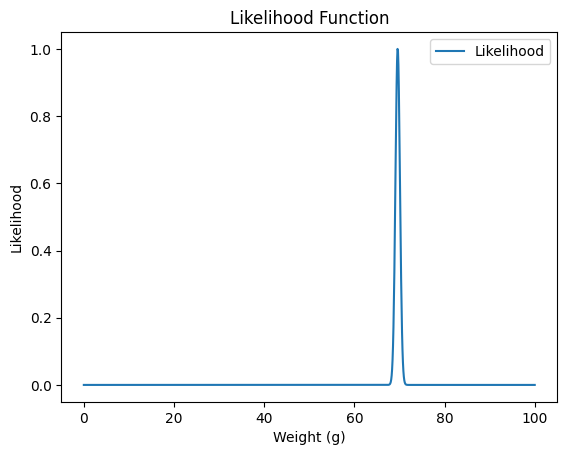

In [12]:
from scipy.stats import norm
import numpy as np

weight_grid = np.linspace(0, 100, 1000)

log_likelihoods = []
for w in weight_grid:
    log_likelihood = np.sum(norm.logpdf(measurements, loc=w, scale=5)) #logP(X|W)
    log_likelihoods.append(log_likelihood)


max_likelihood_index = np.argmax(log_likelihoods)
max_likelihood_weight = weight_grid[max_likelihood_index]

print("MLE of the weight of the apple:", max_likelihood_weight, "g")
print()


import matplotlib.pyplot as plt
#print(log_likelihood)

# Plot likelihood function
plt.plot(weight_grid, np.exp(log_likelihoods - np.max(log_likelihoods)), label='Likelihood')
plt.xlabel('Weight (g)')
plt.ylabel('Likelihood')
plt.title('Likelihood Function')
plt.legend()
plt.show()


Play around with the code and try to answer the following questions regarding MLE and MAP. You can draw plots to visualize as well.

In [19]:
import numpy as np
from scipy.stats import invgamma, norm, uniform, beta

def simulate_apple_weight(barrel_mean=85, barrel_std=20, scale_error=5, num_measurements=10, prior_weight_distribution='normal', prior_weight_params=(50, 1), prior_error_shape=4, prior_beta_alpha=2, prior_beta_beta=2):
    BARREL = np.random.normal(loc=barrel_mean, scale=barrel_std, size=100)
    WEIGHT_GUESSES = np.linspace(1, 200, 100)
    ERROR_GUESSES = np.linspace(.1, 50, 100)
    SCALE_ERR = scale_error
    N_MEASURMENTS = num_measurements

    if prior_weight_distribution == 'normal':
        prior_weight_params = prior_weight_params if len(prior_weight_params) == 2 else (50, 1)
        PRIOR_WEIGHT = norm(*prior_weight_params).logpdf(WEIGHT_GUESSES)
        prior_dist_info = f"Prior Weight Distribution: Normal(mu={prior_weight_params[0]}, sigma={prior_weight_params[1]})"
    elif prior_weight_distribution == 'uniform':
        prior_weight_params = prior_weight_params if len(prior_weight_params) == 2 else (1, 100)
        PRIOR_WEIGHT = uniform(*prior_weight_params).logpdf(WEIGHT_GUESSES)
        prior_dist_info = f"Prior Weight Distribution: Uniform(min={prior_weight_params[0]}, max={prior_weight_params[1]})"
    elif prior_weight_distribution == 'beta':
        PRIOR_WEIGHT = beta(prior_beta_alpha, prior_beta_beta).logpdf((WEIGHT_GUESSES - WEIGHT_GUESSES.min()) / (WEIGHT_GUESSES.max() - WEIGHT_GUESSES.min()))
        prior_dist_info = f"Prior Weight Distribution: Beta(alpha={prior_beta_alpha}, beta={prior_beta_beta})"
    elif prior_weight_distribution == 'invgamma':
        prior_weight_params = prior_weight_params if len(prior_weight_params) == 2 else (4, 0, 1)
        PRIOR_WEIGHT = invgamma(*prior_weight_params).logpdf(WEIGHT_GUESSES)
        prior_dist_info = f"Prior Weight Distribution: Inverse Gamma(shape={prior_weight_params[0]}, scale={prior_weight_params[1]})"
    else:
        raise ValueError("Invalid prior weight distribution. Please choose 'normal', 'uniform', 'beta', or 'invgamma'.")

    PRIOR_ERR = invgamma(prior_error_shape).logpdf(ERROR_GUESSES)
    LOG_PRIOR_GRID = np.add.outer(PRIOR_ERR, PRIOR_WEIGHT)

    def read_scale(apple):
        return apple + np.random.normal(loc=0, scale=SCALE_ERR)

    def get_log_likelihood_grid(measurements):
        log_likelihood = [
            [
                norm(weight_guess, error_guess).logpdf(measurements).sum()
                for weight_guess in WEIGHT_GUESSES
            ]
            for error_guess in ERROR_GUESSES
        ]
        return np.asarray(log_likelihood)

    def get_mle(measurements):
        log_likelihood_grid = get_log_likelihood_grid(measurements)
        max_likelihood_index = np.unravel_index(np.argmax(log_likelihood_grid, axis=None), log_likelihood_grid.shape)
        return WEIGHT_GUESSES[max_likelihood_index[1]]

    def get_map(measurements):
        log_likelihood_grid = get_log_likelihood_grid(measurements)
        log_posterior_grid = log_likelihood_grid + LOG_PRIOR_GRID
        max_posterior_index = np.unravel_index(np.argmax(log_posterior_grid, axis=None), log_posterior_grid.shape)
        return WEIGHT_GUESSES[max_posterior_index[1]]

    print("Input Parameters:")
    print(f"Barrel Mean: {barrel_mean}")
    print(f"Barrel Std: {barrel_std}")
    print(f"Scale Error: {scale_error}")
    print(f"Number of Measurements: {num_measurements}")
    print(f"Prior Weight Distribution: {prior_weight_distribution}")
    if prior_weight_distribution in ['normal', 'uniform', 'invgamma']:
        print(f"Prior Weight Distribution Parameters: {prior_weight_params}")
    elif prior_weight_distribution == 'beta':
        print(f"Prior Beta Distribution Parameters: Alpha={prior_beta_alpha}, Beta={prior_beta_beta}")
    print(f"Prior Error Shape Parameter: {prior_error_shape}")

    apple = np.random.choice(BARREL)
    measurements = np.asarray([read_scale(apple) for _ in range(N_MEASURMENTS)])

    print("\nSimulation Results:")
    print("Chosen apple weight:", apple)
    print("Measurements:", measurements)
    print("Average measurement:", measurements.mean())
    print(prior_dist_info)

    mle_weight = get_mle(measurements)
    map_weight = get_map(measurements)

    print("Maximum Likelihood Estimate (MLE) of the weight of the apple:", mle_weight)
    print("Maximum A Posteriori (MAP) Estimate of the weight of the apple:", map_weight)
    print("__________________________\n")

# Example usage:

simulate_apple_weight(scale_error=5, num_measurements=10)
simulate_apple_weight(prior_weight_distribution='uniform', scale_error=8, num_measurements=15)
simulate_apple_weight(prior_weight_distribution='beta', prior_beta_alpha=3, prior_beta_beta=3, scale_error=6, num_measurements=12)
simulate_apple_weight(prior_weight_distribution='invgamma', prior_weight_params=(6, 0, 1), scale_error=7, num_measurements=10)
simulate_apple_weight(scale_error=4, num_measurements=8)
simulate_apple_weight(prior_weight_distribution='uniform', scale_error=9, num_measurements=20)
simulate_apple_weight(prior_weight_distribution='beta', prior_beta_alpha=2, prior_beta_beta=5, scale_error=7, num_measurements=15)
simulate_apple_weight(prior_weight_distribution='invgamma', prior_weight_params=(5, 0, 1), scale_error=6, num_measurements=12)
simulate_apple_weight(scale_error=6, num_measurements=10)
simulate_apple_weight(prior_weight_distribution='uniform', scale_error=10, num_measurements=15)


Input Parameters:
Barrel Mean: 85
Barrel Std: 20
Scale Error: 5
Number of Measurements: 10
Prior Weight Distribution: normal
Prior Weight Distribution Parameters: (50, 1)
Prior Error Shape Parameter: 4

Simulation Results:
Chosen apple weight: 91.01316906201039
Measurements: [85.28346305 92.35221343 96.00237773 89.4938719  75.96786288 89.91271945
 94.62595066 87.2517828  86.04746341 86.61073474]
Average measurement: 88.35484400551448
Prior Weight Distribution: Normal(mu=50, sigma=1)
Maximum Likelihood Estimate (MLE) of the weight of the apple: 87.43434343434343
Maximum A Posteriori (MAP) Estimate of the weight of the apple: 51.252525252525245
__________________________

Input Parameters:
Barrel Mean: 85
Barrel Std: 20
Scale Error: 8
Number of Measurements: 15
Prior Weight Distribution: uniform
Prior Weight Distribution Parameters: (50, 1)
Prior Error Shape Parameter: 4

Simulation Results:
Chosen apple weight: 98.0034017451468
Measurements: [100.57474289  97.62252442  92.56900631  94.4

In [20]:
#MORE EXAMPLE
simulate_apple_weight(scale_error=5, num_measurements=50)
simulate_apple_weight(scale_error=10, num_measurements=50)
simulate_apple_weight(scale_error=5, num_measurements=100)
simulate_apple_weight(scale_error=10, num_measurements=100)


Input Parameters:
Barrel Mean: 85
Barrel Std: 20
Scale Error: 5
Number of Measurements: 50
Prior Weight Distribution: normal
Prior Weight Distribution Parameters: (50, 1)
Prior Error Shape Parameter: 4

Simulation Results:
Chosen apple weight: 93.05863098872058
Measurements: [ 89.63382212  84.04876737  89.99303757  98.40923423  97.9270153
  94.97069187  93.24585496  84.67055852  92.05981188  96.81766437
 101.91962563  94.91358652  84.26930958  93.70395555  94.43903686
  98.27750747  87.24212347  93.09914013  99.55729392  89.19239423
 105.57374812  92.31073841  84.28379871  96.83129217  88.78144735
  93.50690836  95.24974374  91.17001522  98.68590304  88.74191807
  97.66397331 102.26975838  93.40362929  91.80046114 101.88515702
  94.78107648  90.27109762  90.86219098  89.97019794  94.64652889
  92.41155787 107.88944509  93.24493066  94.72162169  95.72691215
  92.54678657  94.31735541  98.08027869  93.35296969  88.17007918]
Average measurement: 93.83083905517887
Prior Weight Distribution



## 1. How sensitive is the MAP measurement to the choice of prior?

The MAP measurement can be quite sensitive to the choice of prior. Imagine the prior as our initial guess about the parameter before seeing any data. If our guess is way off or biased, it can heavily influence our final estimate, even after seeing the data. For instance, if we're estimating the weight of an apple and we wrongly assume it's always around 100g, our MAP estimate might stubbornly stick close to that value, even if the actual data suggests otherwise. So, choosing a sensible prior based on what we know or expect about the situation is crucial for getting a good MAP estimate.

## 2. How sensitive is the MLE and MAP answer to the grid size?

Both MLE and MAP can be quite sensitive to the grid size we use. Think of the grid as the level of detail we're looking at when exploring possible values for the parameter. If the grid is too coarse, we might miss subtle variations in the data and end up with a less accurate estimate. On the other hand, if the grid is too fine, it's like zooming in too much and we might waste a lot of time crunching numbers without gaining much more insight. So, finding the right balance in grid size is important – not too coarse, not too fine – just enough to capture the nuances of the data without overwhelming our calculations.
